In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,25-34,Osteoporosis,3/16/2010,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or ...",0
1,25-34,Osteoporosis,3/15/2010,lopressor ampul,6878,4,3,this treatment is awsome. I love drugs.,2,Male,,0
2,45-54,Post-Menopausal Osteoporosis Prevention,7/31/2017,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,Male,"Stomach upset, nausea / vomiting , bloating...",0
3,45-54,Post-Menopausal Osteoporosis Prevention,12/29/2016,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1
4,25-34,Osteoporosis,3/16/2010,lithostat,9290,4,3,this treatment is awsome. I love drugs.,2,Male,"Headache , nausea , vomiting , stomach ups...",0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            2278 non-null   object
 1   Condition      2278 non-null   object
 2   Date           2278 non-null   object
 3   Drug           2278 non-null   object
 4   DrugId         2278 non-null   int64 
 5   EaseofUse      2278 non-null   int64 
 6   Effectiveness  2278 non-null   int64 
 7   Reviews        2278 non-null   object
 8   Satisfaction   2278 non-null   int64 
 9   Sex            2278 non-null   object
 10  Sides          2278 non-null   object
 11  UsefulCount    2278 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 213.7+ KB


In [4]:
df['Date'] = df['Date'].astype('datetime64[ns]')

In [5]:
min(df['Date'])

Timestamp('2007-09-18 00:00:00')

In [6]:
max(df['Date'])

Timestamp('2020-02-27 00:00:00')

In [7]:
df = df.drop_duplicates('Reviews')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 2274
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1363 non-null   object        
 1   Condition      1363 non-null   object        
 2   Date           1363 non-null   datetime64[ns]
 3   Drug           1363 non-null   object        
 4   DrugId         1363 non-null   int64         
 5   EaseofUse      1363 non-null   int64         
 6   Effectiveness  1363 non-null   int64         
 7   Reviews        1363 non-null   object        
 8   Satisfaction   1363 non-null   int64         
 9   Sex            1363 non-null   object        
 10  Sides          1363 non-null   object        
 11  UsefulCount    1363 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 138.4+ KB


In [8]:
df.isnull().sum().sum()

0

In [9]:
df_ost = df.loc[df['Condition'].str.contains("Osteoporosis", case=False)]

In [10]:
df_ost.info()
df_ost.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363 entries, 0 to 2274
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Age            1363 non-null   object        
 1   Condition      1363 non-null   object        
 2   Date           1363 non-null   datetime64[ns]
 3   Drug           1363 non-null   object        
 4   DrugId         1363 non-null   int64         
 5   EaseofUse      1363 non-null   int64         
 6   Effectiveness  1363 non-null   int64         
 7   Reviews        1363 non-null   object        
 8   Satisfaction   1363 non-null   int64         
 9   Sex            1363 non-null   object        
 10  Sides          1363 non-null   object        
 11  UsefulCount    1363 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 138.4+ KB


,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,25-34,Osteoporosis,2010-03-16,lotensin,6883,4,3,this treatment is awsome. I love drugs.,2,Male,"Dizziness , lightheadedness , drowsiness, or ...",0
2,45-54,Post-Menopausal Osteoporosis Prevention,2017-07-31,lopreeza,167327,5,2,After taking this drug for approx. 21 days I s...,3,Male,"Stomach upset, nausea / vomiting , bloating...",0
3,45-54,Post-Menopausal Osteoporosis Prevention,2016-12-29,lopreeza,167327,5,5,I have taken this drug for almost 7 years with...,5,Female,"Stomach upset, nausea / vomiting , bloating...",1
5,65-74,Osteoporosis,2010-05-26,liquid calcium + vitamin d,93396,5,5,since I have a hard time swallowing this hs wo...,5,Female,Constipation or stomach upset may occur.,1
19,45-54,Osteoporosis,2012-01-19,oyster shell + d,94390,1,1,I have severe pain in my hand and muscle joint...,1,Female,Constipation or stomach upset may occur.,2


In [11]:
print(df_ost['Condition'].unique())
print(df_ost['Condition'].unique().size)

['Osteoporosis' 'Post-Menopausal Osteoporosis Prevention'
 'Osteoporosis in Male Patient'
 'Aromatase Inhibitor Drug-Induced Osteoporosis'
 'Osteoporosis in Men due to Deficient Function of Testis'
 'Glucocorticoid-Induced Osteoporosis Prevention'
 'Osteoporosis caused by Glucocorticoid Drugs'
 'osteoporosis in postmenopausal woman at high risk for fracture'
 'Osteoporosis caused by Anti-Androgen Drugs']
9


In [12]:
df_ost['Age'].unique()

array(['25-34', '45-54', '65-74', '75 or over', '55-64', '35-44', ' ',
       '19-24', '13-18', '7-12'], dtype=object)

In [13]:
df_ost["Age"] = df_ost["Age"].replace(
    ["25-34","45-54","65-74","75 or over","55-64","35-44","19-24","13-18","7-12"], 
    ["25-34","45-54", "65-74", "75+", "55-64", "35-44", "19-24", "13-18", "7-12"])


<AxesSubplot:title={'center':'Ratings Across Age Group'}, xlabel='Age', ylabel='count'>

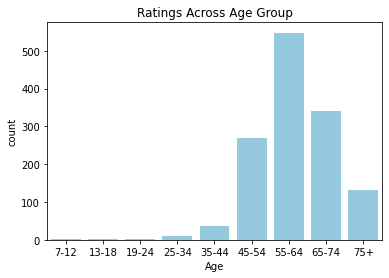

In [14]:
plt.title('Ratings Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["7-12", "13-18", "19-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75+"])

In [15]:
bin_age = []

for age in df_ost['Age']:
    if age == '7-12':
        bin_age.append('0-54')
    elif age == '13-18':
        bin_age.append('0-54')
    elif age == '19-24':
        bin_age.append('0-54')
    elif age == '25-34':
        bin_age.append('0-54')
    elif age == '35-44':
        bin_age.append('0-54')
    elif age == '45-54':
        bin_age.append('0-54')
    elif age == '55-64':
        bin_age.append('55-64')
    elif age == '65-74':
        bin_age.append('65+')
    elif age == '75+':
        bin_age.append('65+')
    else:
        bin_age.append('')

df_ost['Age'] = bin_age

<AxesSubplot:title={'center':'Ratings Across Age Group'}, xlabel='Age', ylabel='count'>

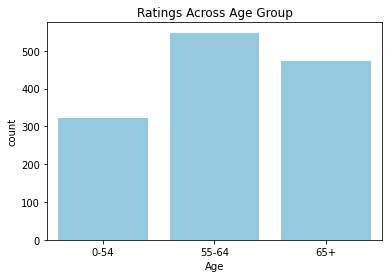

In [16]:
plt.title('Ratings Across Age Group')
sns.countplot(x = 'Age', data = df_ost, color = 'skyblue', order=["0-54", "55-64", "65+"])

In [17]:
df_ost['Drug'].unique()

array(['lotensin', 'lopreeza', 'liquid calcium + vitamin d',
       'oyster shell + d', 'os-cal 500-vit d3', 'mepron',
       "men's potent formula", 'menest',
       'menostar patch, transdermal weekly',
       'minivelle patch, transdermal semiweekly', 'mimvey',
       'prolia syringe', 'prempro', 'premarin',
       'pamidronate disodium vial', 'raloxifene hcl',
       'risedronate sodium', 'replesta', 'reclast bottle, infusion',
       'zometa vial', 'zoledronic acid vial', 'tymlos pen injector',
       'viactiv', 'vivelle-dot patch, transdermal semiweekly',
       'vitamin d3 tablet', 'vitamin d2 capsule', 'vitamin d3',
       'alendronate sodium tablet osteoporosis agents',
       'alendronate sodium tablet', 'angeliq', 'amabelz', 'atelvia',
       'actonel tablet osteoporosis agents', 'actonel 35 mg tablet',
       'activella', 'actical',
       'estradiol transdermal patch patch, weekly', 'estrace',
       'esterified estrogens tablet', 'estradiol', 'evista',
       'etidronate 

In [18]:
Drug = []
for i in df_ost['Drug'].unique():
    if np.sum(df_ost.Drug == i) >= 10:
        Drug.append(i)
Drug

['prolia syringe',
 'prempro',
 'reclast bottle, infusion',
 'zometa vial',
 'zoledronic acid vial',
 'vivelle-dot patch, transdermal semiweekly',
 'alendronate sodium tablet osteoporosis agents',
 'atelvia',
 'actonel tablet osteoporosis agents',
 'actonel 35 mg tablet',
 'evista',
 'fosamax',
 'forteo pen injector',
 'boniva']

In [19]:
tmp = []

for drugs in df_ost['Drug']:
    if drugs in Drug:
        tmp.append(1)
    else:
        tmp.append(0)

df_ost['temp'] = tmp
df_ost.drop(df_ost.index[df_ost['temp'] == 0], inplace = True)
df_ost

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,temp
69,55-64,Osteoporosis,2020-02-24,prolia syringe,154218,1,1,DO NOT LET ANY DOCTOR TALK YOU INTO A PROLIO S...,1,,,2,1
70,65+,Osteoporosis,2020-02-15,prolia syringe,154218,5,5,I've gotten these injections every 6 months fo...,5,,,2,1
71,65+,Osteoporosis,2020-02-02,prolia syringe,154218,5,5,I have had 12 prolia shots. I had my last dex...,5,,,3,1
72,65+,Osteoporosis,2019-12-30,prolia syringe,154218,1,1,I received my one and only injection on March ...,1,,,13,1
73,55-64,Osteoporosis,2019-12-29,prolia syringe,154218,5,3,I was reluctant to take this drug based on peo...,5,,,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2167,65+,Post-Menopausal Osteoporosis Prevention,2007-11-07,boniva,92884,4,1,I experienced severe bone and joint pain about...,1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",43,1
2168,0-54,Post-Menopausal Osteoporosis Prevention,2007-11-07,boniva,92884,2,1,I have taken it twice and both times experienc...,1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",43,1
2169,55-64,Post-Menopausal Osteoporosis Prevention,2007-10-31,boniva,92884,1,1,I have taken Boniva twice and each time have h...,1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",45,1
2170,55-64,Post-Menopausal Osteoporosis Prevention,2007-10-28,boniva,92884,2,1,"I took boniva on 10/1/07, this was the first t...",1,Female,"Stomach upset, diarrhea , pain in arms/legs,...",42,1


In [21]:
print(min(df_ost['Date']))
print(max(df_ost['Date']))

2007-09-18 00:00:00
2020-02-24 00:00:00


In [22]:
print("number of males: ", sum(df_ost['Sex'] == 'Male'))
print("number of females: ", sum(df_ost['Sex'] == 'Female'))

number of males:  64
number of females:  1006


In [23]:
df_ost['Year'] = df_ost['Date'].dt.year

<AxesSubplot:title={'center':'Distribution of Satisfaction'}, xlabel='Satisfaction', ylabel='Count'>

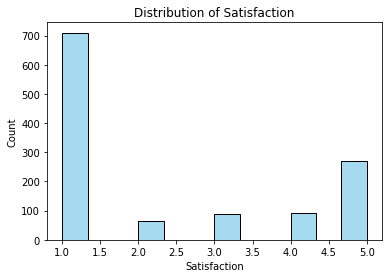

In [24]:
plt.title('Distribution of Satisfaction')
sns.histplot(x="Satisfaction", color = 'skyblue', data = df_ost)

In [25]:
df_ost.groupby('Drug')['Satisfaction'].mean().sort_values(ascending=False).reset_index()

,Drug,Satisfaction
0,prempro,3.750000
1,"vivelle-dot patch, transdermal semiweekly",3.090909
2,forteo pen injector,2.787879
3,"reclast bottle, infusion",2.735043
4,evista,2.226415
5,zometa vial,2.176471
6,prolia syringe,2.036630
7,actonel 35 mg tablet,2.000000
8,actonel tablet osteoporosis agents,1.917355
9,boniva,1.807692


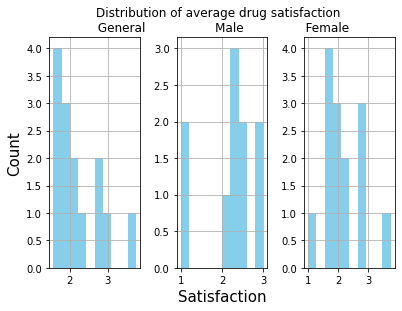

In [26]:
rating_avgs = (df_ost['Satisfaction'].groupby(df_ost['Drug']).mean())
#rating_avgs.hist(color='skyblue')
#plt.title('Distribution of average drug satisfaction')
#plt.xlabel('Satisfaction')
#plt.ylabel('Count')

df_ost_male = df_ost[df_ost['Sex'] == 'Male']
male_rating_avgs = (df_ost_male['Satisfaction'].groupby(df_ost['Drug']).mean())
#male_rating_avgs.hist(color='skyblue')
#plt.title('Distribution of average drug satisfaction - Male')
#plt.xlabel('Satisfaction')
#plt.ylabel('Count')


df_ost_female = df_ost[df_ost['Sex'] == 'Female']
female_rating_avgs = (df_ost_female['Satisfaction'].groupby(df_ost['Drug']).mean())
#female_rating_avgs.hist(color='skyblue')
#plt.title('Distribution of average drug satisfaction - Female')
#plt.xlabel('Satisfaction')
#plt.ylabel('Count')


fig, axs = plt.subplots(ncols=3)
rating_avgs.hist(color='skyblue', ax=axs[0])
male_rating_avgs.hist(color='skyblue', ax=axs[1])
female_rating_avgs.hist(color='skyblue', ax=axs[2])
axs[1].set_xlabel('Satisfaction', fontsize = 15)
axs[0].set_ylabel('Count', fontsize = 15)
axs[1].set_title('Distribution of average drug satisfaction  \n General                  Male                Female')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)

Text(0.5, 1.0, 'Top20 : The number of drugs per condition.')

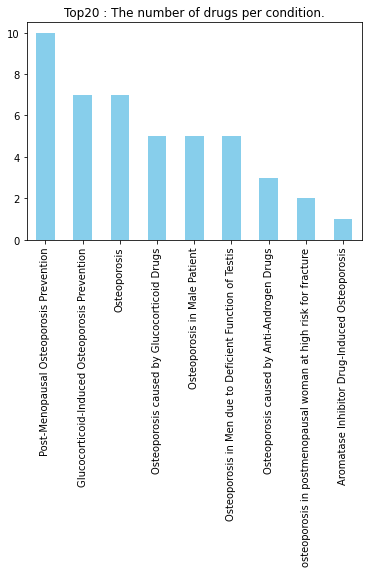

In [27]:
condition_dn = df_ost.groupby(['Condition'])['Drug'].nunique().sort_values(ascending=False)
condition_dn[0:20].plot(kind="bar",color="skyblue")
plt.xlabel("")
plt.ylabel("")
plt.title("Top20 : The number of drugs per condition.")

#figsize = (14,6), fontsize = 10,

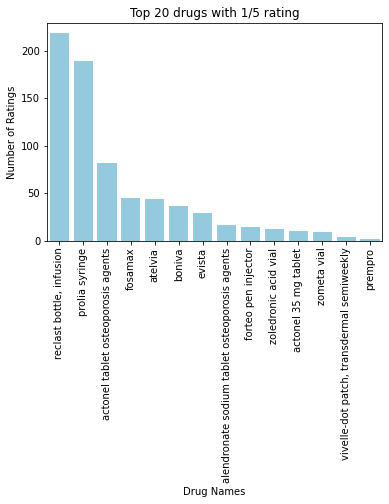

In [28]:
# This barplot shows the Top 20 drugs with the 1/5 rating

# Setting the Parameter
#sns.set(font_scale = 1.2, style = 'darkgrid')
#plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_ost.loc[df_ost.Satisfaction == 1, "Drug"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], color = 'skyblue')

sns_rating.set_title('Top 20 drugs with 1/5 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

In [29]:
# Make dictionary of conditions, each value will be a dataframe of all of the drugs used to treat the given condition
help_dict = {}

# Iterate over conditions
for i in df_ost.Condition.unique():
    
    temp_ls = []
    
    # Iterate over drugs within a given condition
    for j in df_ost[df_ost.Condition == i].Drug.unique():
        
        # If there are at least 10 reviews for a drug, save its name and average rating in temporary list
        if np.sum(df_ost.Drug == j) >= 10:
            temp_ls.append((j, np.sum(df_ost[df_ost.Drug == j].Satisfaction) / np.sum(df_ost.Drug == j)))
        
    # Save temporary list as a dataframe as a value in help dictionary, sorted best to worst drugs
    help_dict[i] = pd.DataFrame(data=temp_ls, columns=['drug', 'average_rating']).sort_values(by='average_rating', ascending=False).reset_index(drop=True)

In [30]:
help_dict['Osteoporosis'].iloc[:100]

,drug,average_rating
0,"reclast bottle, infusion",2.735043
1,zometa vial,2.176471
2,prolia syringe,2.036630
3,actonel 35 mg tablet,2.000000
4,actonel tablet osteoporosis agents,1.917355
5,atelvia,1.706897
6,zoledronic acid vial,1.571429


In [31]:
df_drug1 = df_ost.loc[df_ost['Drug'].str.contains("reclast bottle, infusion", case=False)]
df_drug2 = df_ost.loc[df_ost['Drug'].str.contains("zometa vial", case=False)]
df_drug3 = df_ost.loc[df_ost['Drug'].str.contains("prolia syringe", case=False)]
df_drug4 = df_ost.loc[df_ost['Drug'].str.contains("actonel 35 mg tablet", case=False)]

<AxesSubplot:xlabel='Year', ylabel='Satisfaction'>

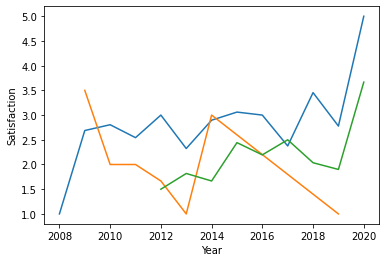

In [32]:
sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug1.groupby("Year")["Satisfaction"].mean().reset_index())
sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug2.groupby("Year")["Satisfaction"].mean().reset_index())
sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug3.groupby("Year")["Satisfaction"].mean().reset_index())
#sns.lineplot(x = 'Year', y = 'Satisfaction', data=df_drug4.groupby("Year")["Satisfaction"].mean().reset_index())

<AxesSubplot:title={'center':'Ratings for Women Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

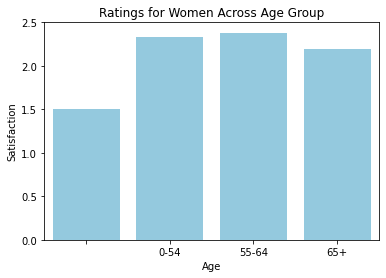

In [33]:
plt.title('Ratings for Women Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost_female.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

<AxesSubplot:title={'center':'Ratings for Men Across Age Group'}, xlabel='Age', ylabel='Satisfaction'>

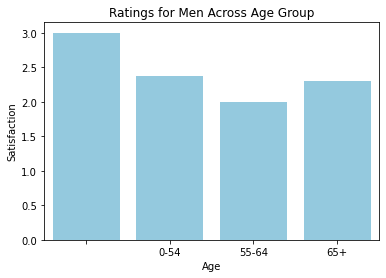

In [34]:
plt.title('Ratings for Men Across Age Group')
sns.barplot(x='Age', y = 'Satisfaction', data = df_ost_male.groupby("Age")["Satisfaction"].mean().reset_index(), color = 'skyblue')

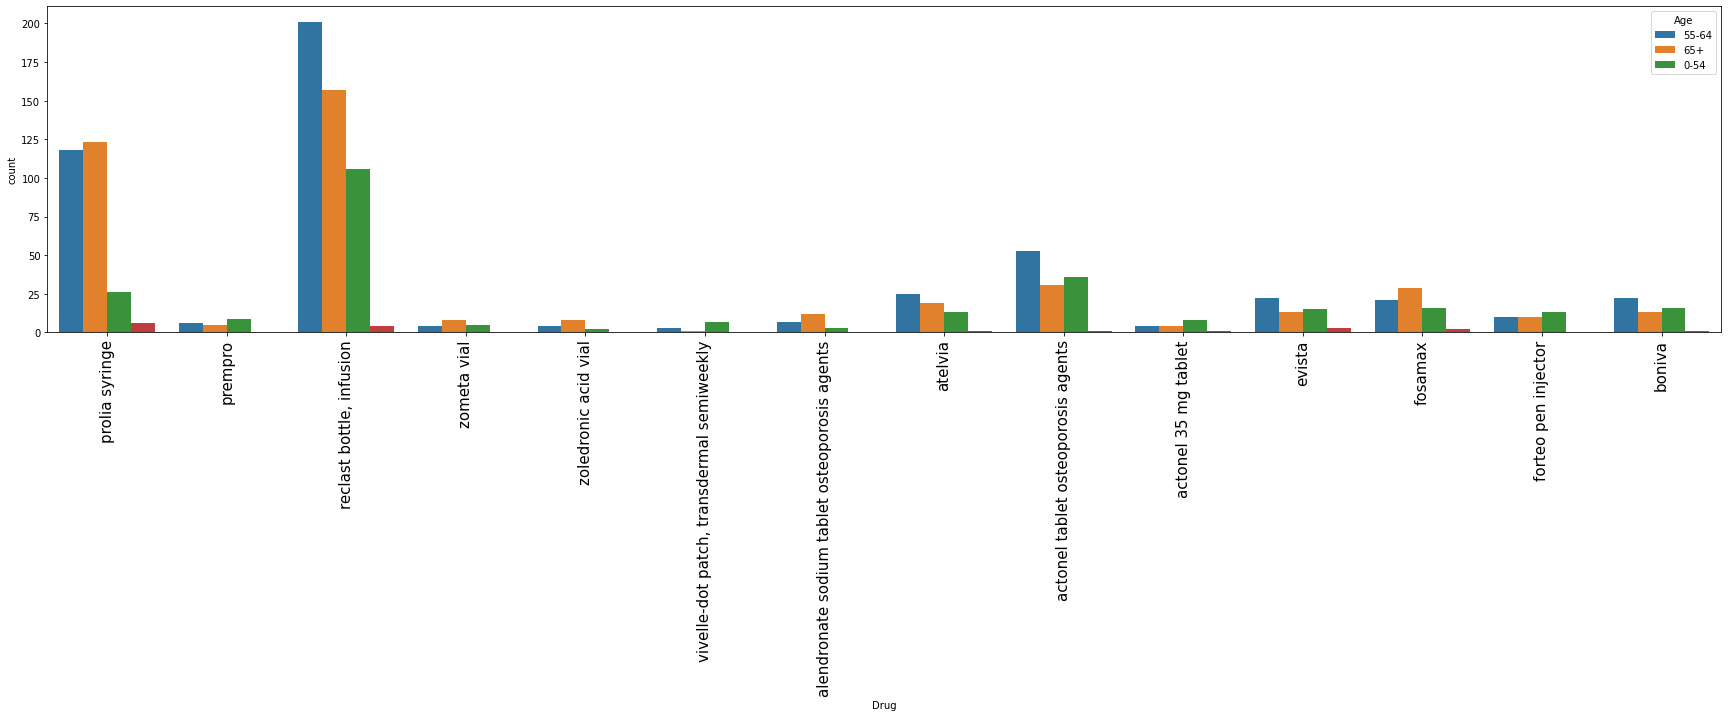

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

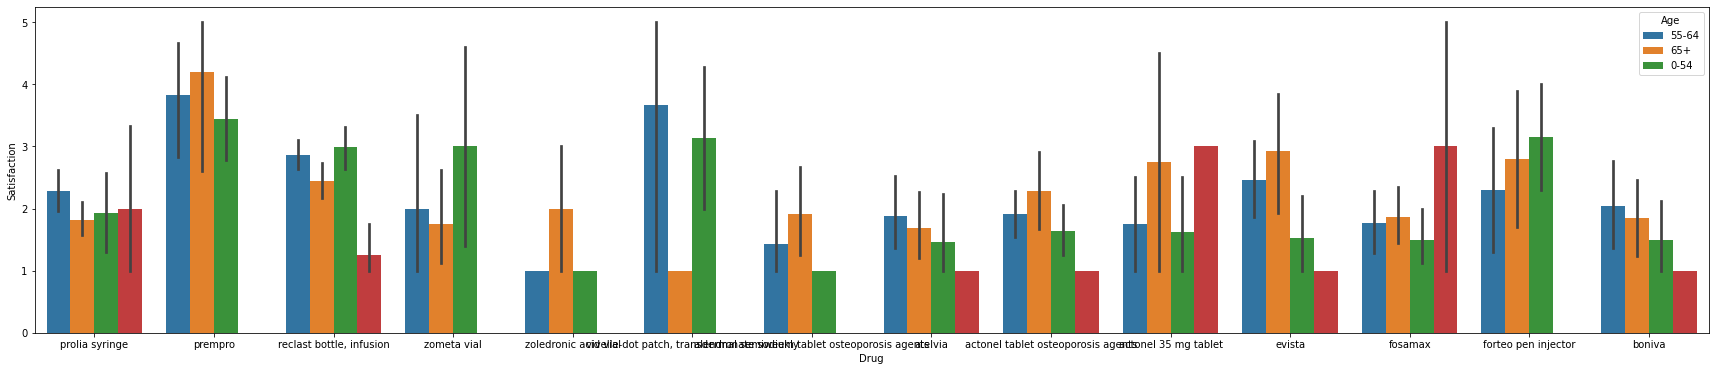

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_bar = sns.barplot(x = 'Drug', y = 'Satisfaction', hue = 'Age', data = df_ost)
#sns_bar = sns.barplot(x='Drug', y = 'Satisfaction', hue = 'Age', data = df_ost_female_45)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

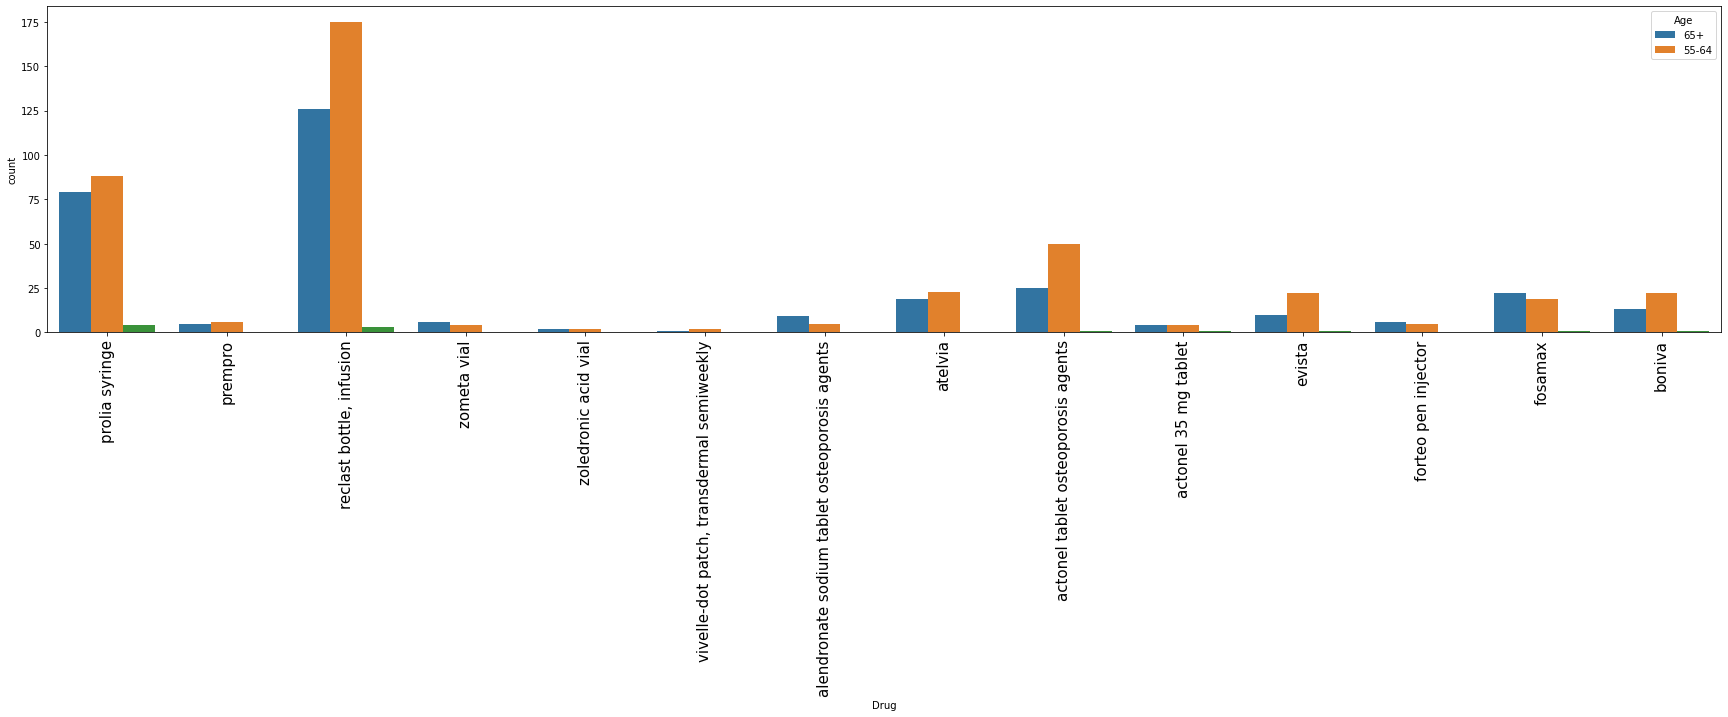

In [37]:
df_ost_female_45 = df_ost_female[df_ost_female['Age'] != '0-54']

fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_count = sns.countplot(x = 'Drug', hue = 'Age', data = df_ost_female_45)
plt.setp(sns_count.get_xticklabels(), rotation=90, fontsize = 15);

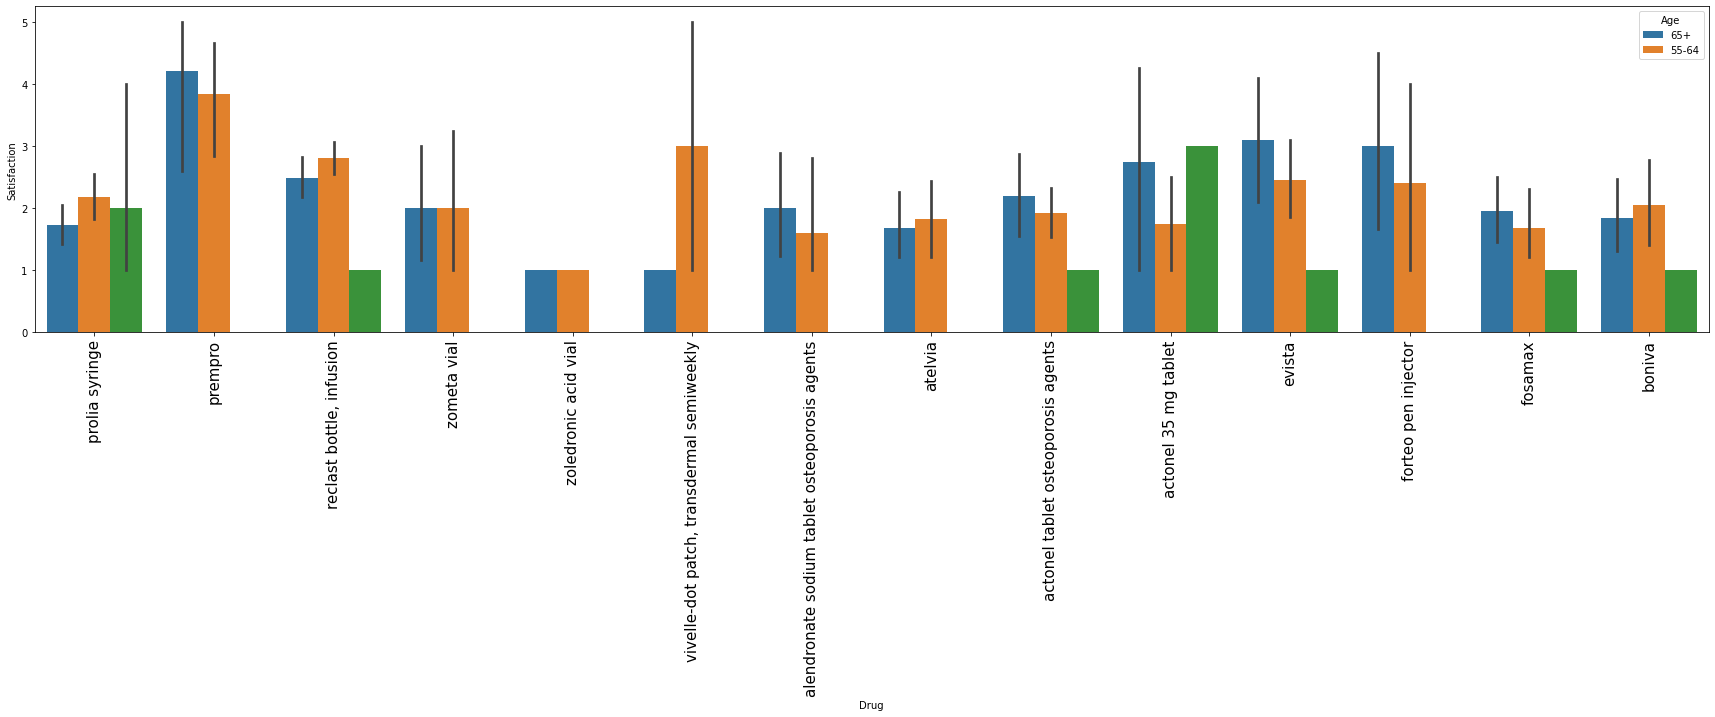

In [45]:
fig, ax = plt.subplots()
fig.set_size_inches(30,6)
sns_bar = sns.barplot(x='Drug', y = 'Satisfaction', hue = 'Age', data = df_ost_female_45)
plt.setp(sns_bar.get_xticklabels(), rotation=90, fontsize = 15);